# Проект "Исследуем успешность игр" 

**Выполнил: Царев Михаил** (tsarevbizz@gmail.com)

**Оглавление:**

* 1. [Импорт библиотек, загрузка датасета, первичное знакомство с данными](#x1)
    * 1.1 [Выводы раздела](#x1.1)  
* 2. [Первичная обработка датасета](#x2)
    * 2.1 [Поиск дубликатов](#x2.1)
    * 2.2 [Замена имен столбцов](#x2.2)  
    * 2.3 [Обработка пропусков](#x2.3)
    * 2.4 [Изменяем типы столбцов](#x2.4) 
    * 2.5 [Добавление столбца с суммой продаж](#x2.5)  
    * 2.6 [Выводы раздела](#x2.6)    
* 3. [Проводим исследовательский анализ](#x3)
    * 3.1 [Платформы и время: кто кого?](#x3.1)
    * 3.2 [Как обстоят дела с продажами на разных платформах](#x3.2)
    * 3.3 [Как связаны продажи и критики, продажи и пользователи](#x3.3)
    * 3.4 [Как связаны продажи и жанры: постреляем в монстров или поломаем голову над квестом?](#x3.4)
    * 3.5 [Выводы раздела](#x3.5)
* 4. [Портреты пользователей](#x4)
    * 4.1 [Самые популярные платформы в каждом регионе](#x4.1)
    * 4.2 [Самые популярные жанры в каждом регионе](#x4.2)
    * 4.3 [Влияет ли рейтинг ESRB на продажи?](#x4.3)
    * 4.4 [Выводы раздела](#x4.4)    
* 5. [Исследование статистических показателей](#x5)
    * 5.1 [Расчет статистических показателей](#x5.1)
    * 5.2 [Диаграммы рассеяния](#x5.2)     
    * 5.3 [Выводы раздела](#x5.3)    
* 6. [Проверка гипотез](#x6)
    * 6.1 [Проверка гипотезы 1](#x6.1) 
    * 6.2 [Проверка гипотезы 2](#x6.2) 
    * 6.3 [Выводы раздела](#x6.3)   
* 7. [Общие выводы](#x7)

<a name="x1"></a> 
## Импорт библиотек, загрузка датасета и первичное знакомство с данными 


In [1]:
# загрузка нужных библиотек

import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# загружаем датасет
df = pd.read_csv('games.csv')

# посмотрим на данные (первые 10 строк)
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# смотрим типы данных для столбцов

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a name="x1.1"></a> 
### Выводы раздела

Видно, что в данных есть пропуски. Пока все хорошо только со столбцами с продажами.
Заметна проблема со столбцом год (он почему-то float вместо int) и рейтингами - там присутствуют пропуски. Есть два пропуска в столбце с жанром. Но для начала имеет смысл проверить дубликаты.
Ну и имена столбцов лучше привести к нижнему регистру для удобства.

<a name="x2"></a> 
## Первичная обработка датасета: заменяем имена столбцов, работаем с пропусками

Начнем готовить наш датасет к анализу.

<a name="x2.1"></a> 
### Поиск дубликатов

In [4]:
df.duplicated().sum()

0

Дубликатов нет, смело идем дальше. 

<a name="x2.2"></a> 
### Замена имен столбцов

In [5]:
# Заменим имена столбцов, для большего удобства дальнейших манипуляций.

new_names = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 
             'critic_score', 'user_score', 'rating']
df.set_axis(new_names, axis='columns', inplace=True)

# проверяем, что замена прошла успешно
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a name="x2.3"></a> 
### Обработка пропусков в данных

In [6]:
# Суммарное количество пропусков, выявленных методом isnull() в таблице df:

df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# Посмотрим на пропуски в genre и name

df[(df['name'].isnull()) | (df['genre'].isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как мы видим, пропуски по жанру и имени оказались в одних и тех же строках, их всего 2. Считаю, что их можно удалить без вреда для исследования. В любом случае, по таким данным какие-то выводы мы сделать все равно не сможем - имени нет, рейтингов нет, смысла тоже нет.

In [8]:
df.drop(df[df['name'].isnull()].index, inplace=True) #можно оставить только одно условие - строки-то те же.
df.reset_index(inplace=True, drop=True) # обновим индексы
df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Все прошло хорошо, стало на две строки меньше и пропуски остались лишь в годах и рейтингах. Посмотрим на пропуски в годах

In [9]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


У нас 269 таких строк, удалять их уже не стоит. Но и восстановить годы мы не сможем.
Возможно, имеет смысл заполнить их каким-то произвольным числом, вне диапазона исследования, чтобы можно было работать с такими-строками как с отдельной категорией

In [10]:
df['year_of_release'].replace(np.nan, 404, inplace=True) # 404 потому что искомое не найдено :)
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Осталось решить вопрос с рейтингами.

In [11]:
print(df['critic_score'].mean()) 

# тут все ок. можно не трогать NaN, среднее - 88.45564711585071
# print(df['user_score'].mean()) # а вот эта строка вызывает ошибку, разберемся почему


68.96767850559173


In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В список закрались какие-то строки 'tbd', посмотрим, что это за строки и найдем их количество.

In [13]:
tbd = df[df['user_score'] == 'tbd']
tbd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,404.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [14]:
print(len(df[df['user_score'] == 'tbd']))

2424


Логика не просматривается: года, платформы - все разное. Поиск в интернете по данной аббревиатуре дал след. результат:
"Аббревиатура tbd не скрывает в себе никаких таинственных смыслов и расшифровывается очень просто - To Be Determined, то есть "Будет определено".
Т.е. получается, что рейтинг просто не определен. Наверное, лучше заменить их на NaN, после чего столбец можно будет привести к float. Пока не знаю, но возможно, дальше мы будем делать какие-то расчеты по столбцам с рейтингом.

In [15]:
df['user_score'].replace('tbd', np.nan, inplace=True)

# проверяем
df['user_score'].unique()
# готово

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Посмотрим на столбец rating - т.е возрастные категории


In [16]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
# посмотрим в каких сторках закрались nan-ы

df[df['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Таких строк много, и если rating NaN, то во всех строках и остальные рейтинги NaN. Система тут есть.
Считаю, что местные nan-ы лучше не оставлять, а заменить их на более понятное "unknown", поскольку все остальные значения тут строковые, возможно, данный пропуск связан с отсутствием информации о рейтинге.

In [18]:
df['rating'].replace(np.nan, 'unknown', inplace=True)

# проверяем
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Так явно лучше.
Теперь на всякий случай, посмотрим, какие значения лежат в столбце platform:

In [19]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

И в genre:

In [20]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Вроде никакого мусора. значит, теперь все ок. с этим уже можно работать.

<a name="x2.4"></a> 
### Приведение значений в столбцах к нужным типам

Снова взглянем на типы столбцов.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Все продажи float, тут все ок.
Год явно следует привести к integer, а user_score к float.
Другие столбцы трогать не нужно.

In [22]:
df = df.astype({'year_of_release': int, 'user_score': float, })

In [23]:
# проверяем 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [24]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


<a name="x2.5"></a> 
### Добавление столбца с суммой продаж по всем регионам
В завершение добавим столбец с суммой продаж по всем регионам (причем, сразу на 8 позицию для удобства).

In [25]:
# создаем новый столбец, равный сумме трех других, вставляем на нужную позицию таблицы

new_column = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.insert(8, 'total_sales', new_column)

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,unknown


<a name="x2.6"></a> 
### Выводы раздела

**Итак, данные подготовлены:**


1. Удалены две неинформативные строки. Всего две, а строк у нас тысячи, поэтому просто помахали им ручкой и попрощались.
2. В столбце год пропуски заменены на значение 404, сам столбец приведен к целочисленному типу. Все-таки год - это целое число.
3. В столбцах с оценками оставили nan (они не помешают), а вот строковое значение tbd в user_score заменили на более подходящее nan чтобы привести столбец к типу float и иметь возможность что-нибудь там считать (вдруг пригодится).
4. Nan в возрастных категориях заменили на более информативное unknown
5. Добавили новый столбец total_sales с суммой продаж по всем регионам и вставили его на нужную позицию.
6. Ну и имена столбцов привели к нижнему регистру.

Теперь с этими данными можно работать. Потери (2 строки) несущественны, а удобства явно прибавилось. Пропуски в данных можно объяснить отстутсвием информации у составителей датасета, либо отсутствием этих оценок в принципе. А наличие строкового значения tbd - принятым в отрасли сокращением.
В любом случае, если есть возможность связаться с составителями датасета, следовало бы уточнить у них причины пропусков (если представить, что мы работаем в команде).


<a name="x3"></a> 
## Проводим исследовательский анализ

Постараемся выжать максумум из тех данных, что мы имеем.

<a name="x3.1"></a> 
### Платформы и время: кто кого?

Посмотрим сколько игр выпускалось в разные годы и для наглядости выведем столбчатую диаграмму

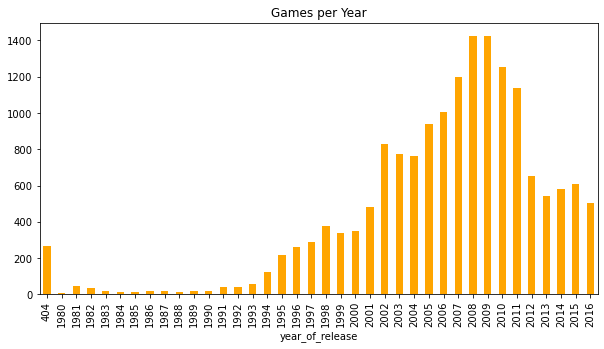

In [26]:
# соберем нужные данные
years_and_games = df.groupby('year_of_release')['name'].count()

# выведем график
years_and_games.plot(kind='bar', figsize=(10, 5), color = 'orange', title='Games per Year')
plt.show()

Видно, что в 80-е и 90-е годы игр выпускалось немного - не более 100. Пик же пришелся на 2008 и 2009-е годы: более 1400 игр за год! Но 80-е это своя атмосфера и свои технологии, современные игры значительно отличаются. И на мой взгляд, наиболее интересные для нас данные - это период с середины 90-х, когда персональные компьютеры получили широкое распространение, и интернет начал распространяться среди обычных пользователей.
Особняком стоит наша группа 404 - по количеству игр она равна примерно середине 90-х, но что там на самом деле сказать сложно. Если пропуски в годах носят случайный характер, то они, вероятно, распределились бы (может даже нормально) по другим годам и не исказили бы сильно нашу картину. В дальнейшем ограничим наш фрейм 2000 годом по левой границе.

Теперь посмотрим как обстоит ситуация с распределением по платформам.

In [27]:
# временно избавимся от группы 404 (неизвестные года)
years_we_know = df.query('year_of_release != 404')


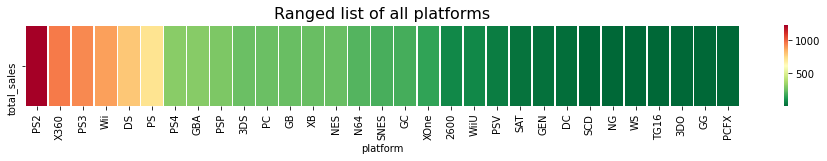

In [28]:
# соберем информацию об успешности платформ (по суммарным продажам)

years_and_platforms = years_we_know.groupby(['platform']).agg(
        {'total_sales':'sum'}).sort_values(
        by = 'total_sales', ascending = False)

# визуализируем результат в виде горизонтальной "тепловой диаграммы" - слева самые успешные плафтормы за все время наблюдений
# справа - самые неуспешные, а цветовая индикация покажет нам распределение значений

plt.figure(figsize=(16, 1.5))
plt.title('Ranged list of all platforms', fontsize=16)
sns.heatmap(years_and_platforms.T, cmap='RdYlGn_r', linewidths=0.5)
plt.show()

*Когда-то у меня была приставка Panasonic 3DO (третья с конца), но выход PS (в лидерах на 6-ой позиции) 
поставил на 3DO крест :( диски к своей я еще долго искал по разным барахолкам - официально их продавать перестали, а новых игр хотелось... Много лет спустя, - уже в 2005-ом, я продал эту приставку со всеми дисками коллеге по работе (он хотел что-то такое "ретро" и именно без возможности покупать новые игры), но это уже совсем другая история...*

Выведем 5 самых успешных и 5 наименее успешных плафторм за все время:

In [29]:
# Для этого получим имена платформ в виде списка

platform_list_sorted = years_and_platforms.index.tolist()
print(f'Наиболее успешные: {platform_list_sorted[:5]}')
print(f'Наименее успешные: {platform_list_sorted[-5:]}')



Наиболее успешные: ['PS2', 'X360', 'PS3', 'Wii', 'DS']
Наименее успешные: ['WS', 'TG16', '3DO', 'GG', 'PCFX']


In [30]:
# Напишем функцию для быстрого вывода графиков

def plot_machine(list_of_names, data, stl='-', period=(1980, 2016), fsize=(16,10), plot_title=''):
    for pltf in list_of_names:
        pltf_data = data.query('platform == @pltf')
        pltf_data.groupby('year_of_release')['total_sales'].sum().plot(
            kind='line', label=pltf, legend=True, style=stl, xlim=period, figsize=fsize)
    plt.title(plot_title, fontsize=16)   
    plt.show()

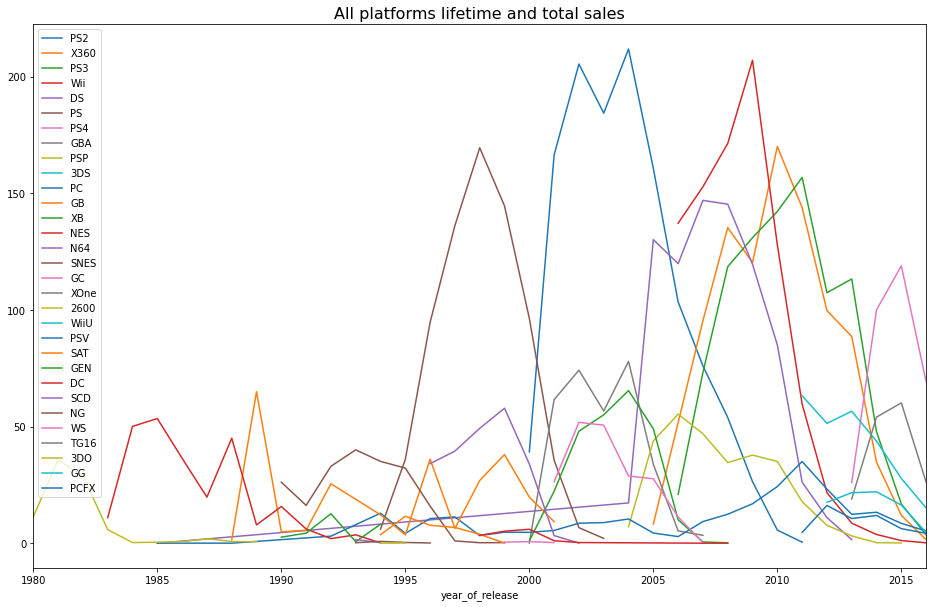

In [31]:
# Теперь построим графики за все время наблюдений по всем платформам

plot_machine(platform_list_sorted, years_we_know, plot_title='All platforms lifetime and total sales')

С одной стороны, график получился: можно сделать вывод, что активная фаза жизненного цикла платформы приходится на период в 7-12 лет, но с другой - слишком уж много всего на экране.
Сделаем еще один график для 5 наиболее популярных платформ. Также, дополнительно ограничим период наблюдений 1995 годом по левой стороне и 2015 по правой - это нужно сделать, чтобы исключить провалы в 2016 году. Насколько мне известно, массового вымирания геймеров в 2016 году не наблюдалось, а значит, падение популярности сразу всех платформ скорее всего вызвано неполными данными - возможно, их готовили еще до получения полной статистики за 2016 год.

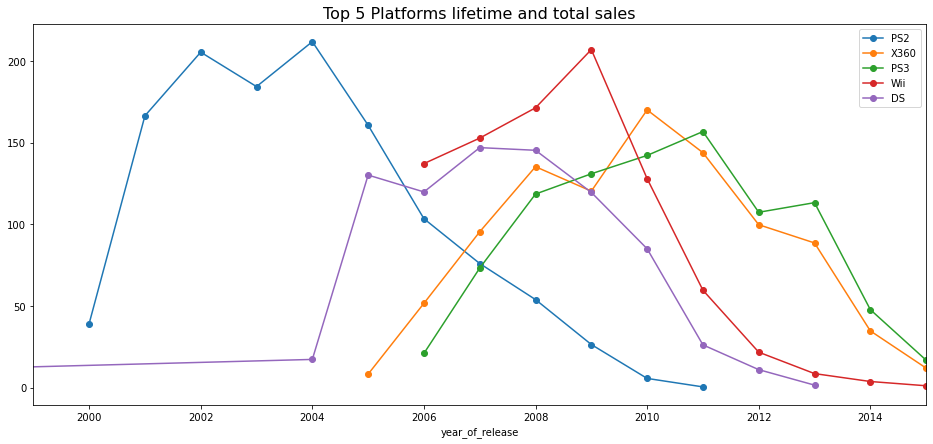

In [32]:
# выведем топ-5 за все время наблюдений

plot_machine(platform_list_sorted[:5], years_we_know,'-o', (1999, 2015), (16,7), plot_title='Top 5 Platforms lifetime and total sales')

Что ж, результаты совпали с нашим списком топ-5, приведенным выше, даже несмотря на ограничение по годам.
Но как мы видим, наш топ-5 постепенно превращется в аутсайдеров. 
Попробуем найти наиболее перспективные платформы на сегодня.
Логика следующая: игры на платформах выпускались после 2010 года (т.е достаточно свежие), платформы существуют и сейчас, при этом доходы в 2015 превышают доходы за предыдущие года.

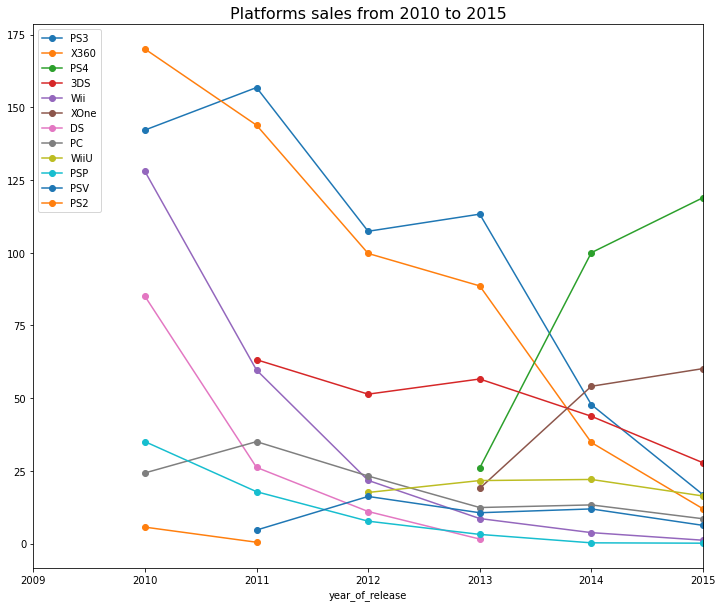

In [33]:
# выберем нужную часть данных:

last_years = df.query('2010 <= year_of_release <= 2015')
last_years_and_platforms = last_years.groupby(['platform']).agg(
        {'total_sales':'sum'}).sort_values(
        by = 'total_sales', ascending = False)
modern_platforms_list_sorted = last_years_and_platforms.index.tolist()

# теперь построим для нее график

plot_machine(modern_platforms_list_sorted, last_years,'-o', (2009, 2015), (12,10), 
             plot_title='Platforms sales from 2010 to 2015')

Потенциально успешными кажутся PS4 и XOne - и это не удивительно.
Ведь данные платформы это просто новые инкарниции устаревающих лидеров прошлых лет - PS3 и XBox. Имена новые, а хозяева все те же. Для дальнейшего исследования возьмем период с 2010 по 2015 годы. Все-таки в мире it все меняется ну очень стремительно, а мы - смотрим в будущее

Составим список платформ с которыми будем работать - они появились после 2010 года, выберем их вручную по графику.

In [34]:
good_data_platforms = ['3DS', 'WiiU', 'PSV', 'PS4', 'XOne']

# получим нужный срез
good_data = df.query('platform in @good_data_platforms')

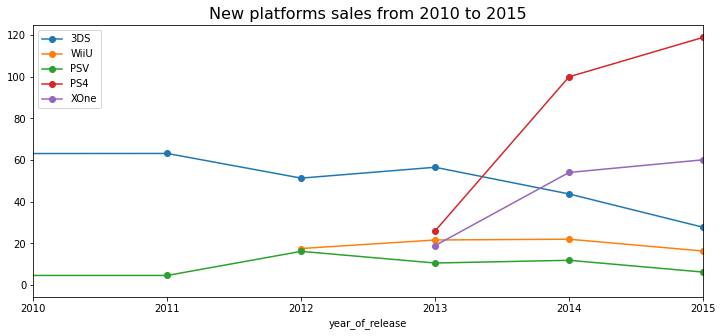

In [35]:
plot_machine(good_data_platforms, good_data,'-o', (2010, 2015), (12,5), plot_title='New platforms sales from 2010 to 2015')

Теперь очень хорошо видно, что позитива стоит ждать от PS4 и Xone. Я бы делал ставку именно на них. Их "прародители" хорошо зарекомендовали себя в прошлом, так что и эти ребята не подведут. Будущее остальных платформ из нашего списка скорее под вопросом...


<a name="x3.2"></a> 
### Как обстоят дела с продажами на разных платформах

Теперь посмотрим, что у нас происходит с глобальными продажами: построим диаграммы размаха.
Казалось бы, при чём здесь усы? ;)

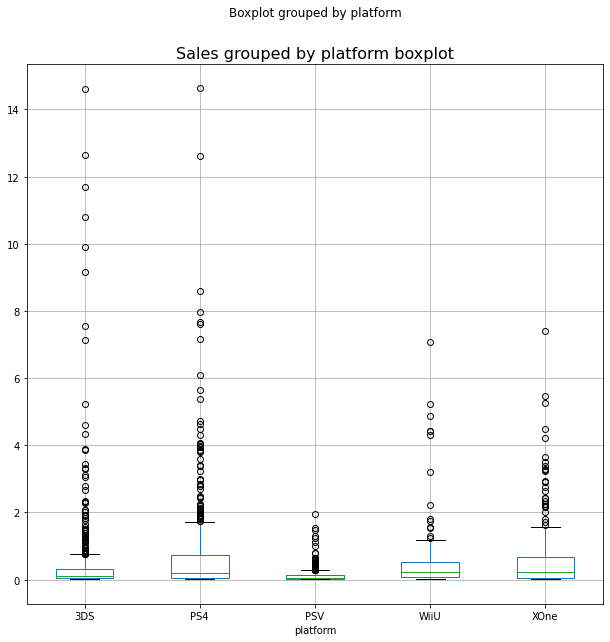

In [36]:
good_data.boxplot(by='platform', column=['total_sales'], figsize=(10,10))
plt.title('Sales grouped by platform boxplot', fontsize=16)
plt.show()

# от красного оповещения избавиться так и не смог :( I need some help here.

Что мы увидели? Большая часть игр приносит сравнительно низкий доход по сравнению с "хитами", которые обеспечивают значительную долю прибыли. Как говорится, не числом, так качеством. Интересно посмотреть на этих красавцев с продажами более 10 млн $. Что это за игры? В каких они жанрах? На каких платформах?

In [37]:
good_data.query('total_sales > 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,unknown
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,unknown
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,12.65,85.0,8.2,E
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,11.68,NaN,NaN,unknown
53,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,10.81,90.0,8.4,E


Жанры разные, но даже я (не геймер от слова совсем) слышал почти про все эти игры. Значит они действительно популярны, а известность и деньги всегда где-то рядом. Да, игры дожно быть действительно интересные.

Забавно, что если про PS4 (и всю серию PlayStation) знают практически все, то про 3ds (провел скромный опрос среди своих студентов), слышали лишь несколько человек. Но она ведь так популярна? В чем же секрет. Он кроется в названии - 3ds звучит не очень информативно, но это же Nintendo! Еще один опрос по слову Nintendo - совсем другие результаты :) 

Теперь посмотрим на диаграммы размаха без выбросов, чтобы получше разглядеть сами "ящики".

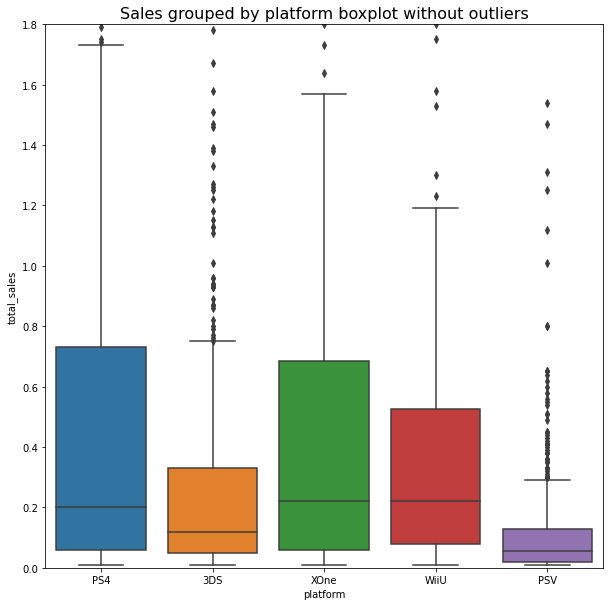

In [38]:
# отбросим часть выбросов

plt.figure(figsize=(10,10))
plt.title('Sales grouped by platform boxplot without outliers', fontsize=16)
sns.boxplot(x = 'platform', y = 'total_sales', data=good_data);
plt.ylim(0,1.8)
plt.show()

Межквартильный размах моменьше у 3DS, зато выбросы вверх у нее идут "тугой струей", такое ощущение, что эта платформа отличается повышенным количеством хитов. 

PS4 и XOne имеют больший межквартильный размах, а значит игры, выпускаемые на них, отличаются большим разнообразием. 
Медианы же на удивление близки почти у всех участников выборки (кроме PSV). 

Основными конкурентами кажутся PS4 и XOne. Не зря мы ранее сделали ставку именно на них. WiiU вроде тоже где-то рядом, но мы-то знаем, что времена её славы уже прошли, если верить нашим графикам.

<a name="x3.3"></a> 
### Как связаны продажи и критики, продажи и пользователи

Теперь посмотрим как влияют на продажи отзывы критиков и оценки пользователей. Рассмотрим это на примере одной, самой успешной платформы.

Как определить успешность? Общая прибыль, срок жизни? Может показаться, что надо искать что-то среднее - выбрать самую прибыльную среди плафторм "долгожителей". Но если подумать, то бизнес- это ведь всегда про деньги. И если одна платформа заработала 10 млн за 5 лет, а вторая 9 млн за 6 лет, то успешнее явно первая, хоть она и "прожила" меньше. Ведь деньги инвесторов вернулись быстрее (ROI), да еще и в большем количестве. Более того, "смерть" платформы это не всегда конец. Зачастую это просто перерождение (привет, буддистам) - например PS3 пришла на смену PS2, как новый виток эволюции.
Поэтому в данном проекте успешную платформу найдем максимально просто: выберем самую прибыльную за все время наблюдений.

In [39]:
# выведем 3 лидеров по продажам

df.groupby('platform').total_sales.sum().sort_values(ascending=False).head(3)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Name: total_sales, dtype: float64

Самой успешной оказалась PS2. Сообственно этот результат мы уже видели ранее, на нашей "градиентной диаграмме", а данный расчет не более, чем самопроверка.
Рассмотрим на примере PS2 взаимосвязь отзывов и оценок с продажами.

In [40]:
ps2_data = df.query('platform == "PS2"')
ps2_data_corr_set = ps2_data[['total_sales', 'user_score', 'critic_score']]
ps2_data_corr_set.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,0.172866,0.395435
user_score,0.172866,1.000000,0.563254
critic_score,0.395435,0.563254,1.000000


Построим диаграмму рассеяния для отображения связи между оценками пользователей и продажами.

In [41]:
# напишем функцию для вывода данного графика
# для большей наглядности сразу подрезали выбросы для получения адекватного масштаба
# графики выведем рядом с помощью subplot

def scatterplot_from_data(x1_col, x2_col, y_col, pdata, title, fsize=(12,4), yl=(0,9)):
    fig, ax =plt.subplots(1,2, figsize=fsize)
    ax[0].title.set_text(title + ' user scores and sales scatter plot')
    ax[0].title.set_size(14)
    ax[0].set_ylim(yl)
    ax[1].title.set_text(title + ' critic scores and sales scatter plot')
    ax[1].title.set_size(14)
    ax[1].set_ylim(yl)
    sns.scatterplot(x=x1_col, y=y_col, data=pdata, ax=ax[0])
    sns.scatterplot(x=x2_col, y=y_col, data=pdata, ax=ax[1])

    plt.show()

Построим диаграммы рассеяния для отображения связи между оценками пользователей и продажами, оценками критиков и продажами.

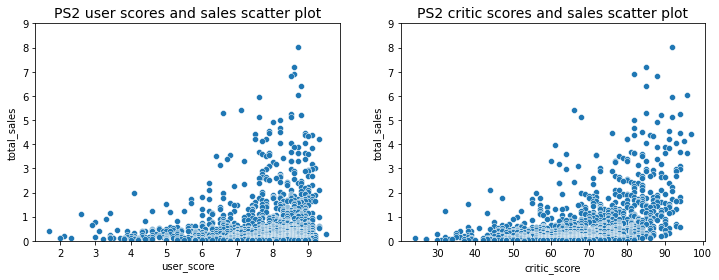

In [42]:
scatterplot_from_data('user_score', 'critic_score', 'total_sales', ps2_data_corr_set, 'PS2')

Теперь проделаем все то же самое для остальных платформ, исключив PS2.

In [43]:
other_platforms_data = df.query('platform != "PS2"')

# проверяем корреляцию
other_platforms_data_corr_set = other_platforms_data[['total_sales', 'user_score', 'critic_score']]
other_platforms_data_corr_set.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,0.076642,0.227382
user_score,0.076642,1.000000,0.595958
critic_score,0.227382,0.595958,1.000000


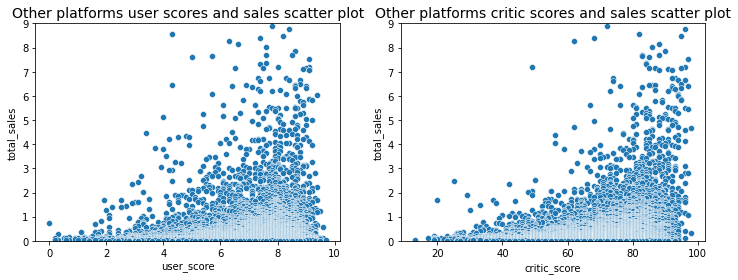

In [44]:
# выводим графики

scatterplot_from_data('user_score', 'critic_score', 'total_sales', other_platforms_data, 'Other platforms')

Что мы получили?
Корреляция между оценками пользователей и продажами существует, но она очень незначительная:

**0.172866** для самой популярной платформы PS2 

**0.076642** для всех остальных плафторм вместе взятых, за вычетом PS2. 

Это значит, что оценки пользователей нам мало интересны - принимать решение на их основе не лучшая идея для бизнеса.

Зато оценки критиков имеют более значимую корреляцию с продажами:

**0.395435** для нашей PS2

**0.227382** для всех остальных платформ

Их уже можно принимать в расчет, особенно когда речь идет о популярных платформах, а мы думаем, какие игры закупить.

При этом можно выделить еще несколько наблюдений:
1. Лучше всего продаются игры с оценками в районе 80 баллов от критиков (или в районе 7-8 баллов от пользователей)
2. Критики, впрочем как и пользователи, не хотят ставить максимальные оценки даже очень популярным играм. Сказывается человеческая природа: мы всегда хотим большего. Даже если мы всем довольны, но надо выбрать оценку от 1 до 10, большинство выберет 8-9. 
3. Выбросы (игры-хиты) встречаются в пользовательских оценках менее упорядоченно, а вот в оценках экспертов виден четкий уклон вправо - чем выше оценка, тем больше концентрация выбросов (особенно хорошо это заметно на последнем графике).
4. В целом несмотря на сравнительно невысокую корреляцию, мы все же наблюдаем некую связь между продажами и оценками. 


<a name="x3.4"></a> 
### Как связаны продажи и жанры: постреляем в монстров или поломаем голову над квестом?

Попробуем понять, существуют ли более прибыльные жанры или все игры продаются одинаково.

In [45]:
# построим диаграмму, за основу возьмем платформы, которые мы отобрали раннее, архаичные данные нам не интересны

sales_and_genres = good_data.groupby(['genre']).agg({'total_sales':'sum'}).sort_values(by = 'total_sales', ascending = False)
sales_and_genres

,total_sales
genre,
Action,227.74
Shooter,160.07
Role-Playing,139.07
Sports,95.87
Platform,65.24
Racing,47.27
Misc,43.50
Fighting,30.55
Simulation,29.65


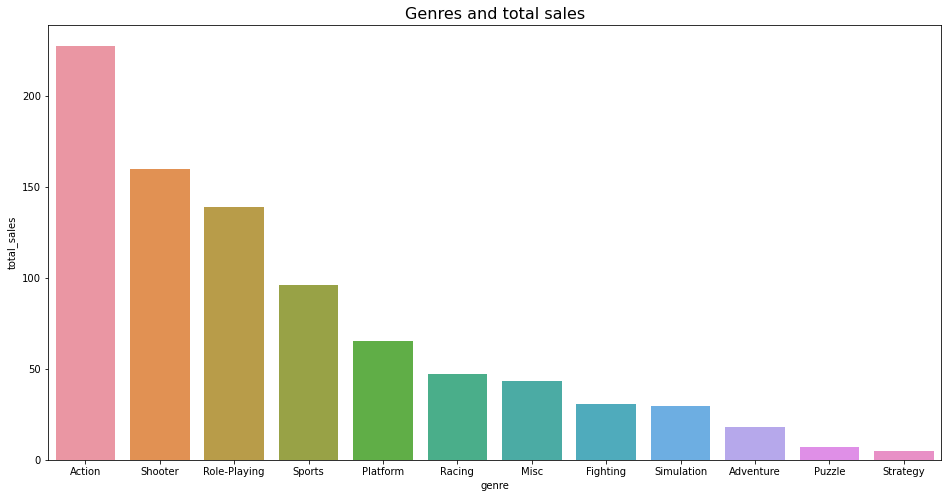

In [46]:
# представим эту же информацию в виде гистограммы
# получим список для задания правильного порядка колонок
col_order1 = sales_and_genres.index

plt.figure(figsize=(16, 8))
sns.barplot(x='genre', y='total_sales', data=good_data, ci=None, estimator=sum, order=col_order1 )
plt.title('Genres and total sales', fontsize=16)
plt.show()

Люди играют в игры, чтобы расслабиться. Наши исследования подтверждают это: action, shooter и rpg - самые популярные жанры. А квесты, головомки и стратегии - удел "умников", коих в современном обществе не так уж и много (шутка).
На всякий случай посмотрим, сколько всего выпускается игр в каждом жанре: есть ли связь и между популярностью и производством.

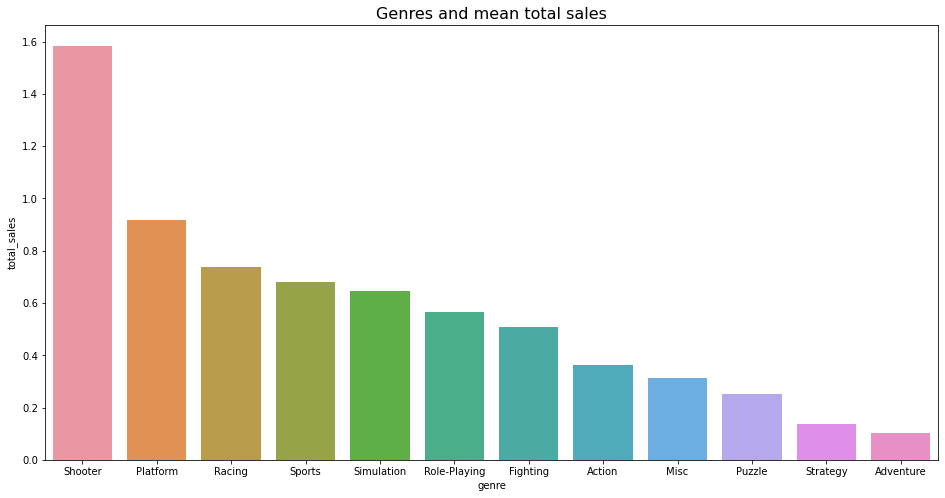

In [47]:
sales_and_genres_mean = good_data.groupby(['genre']).agg({'total_sales':'mean'}).sort_values(by = 'total_sales', 
                                                                                             ascending = False)
col_order1_1 = sales_and_genres_mean.index

plt.figure(figsize=(16, 8))
sns.barplot(x='genre', y='total_sales', data=good_data, ci=None, estimator=np.mean, order=col_order1_1 )
plt.title('Genres and mean total sales', fontsize=16)
plt.show()

In [48]:
games_and_genres = good_data.groupby(['genre']).agg({'name':'count'}).sort_values(by = 'name', ascending = False)
games_and_genres


,name
genre,
Action,630
Role-Playing,246
Adventure,176
Sports,141
Misc,139
Shooter,101
Platform,71
Racing,64
Fighting,60


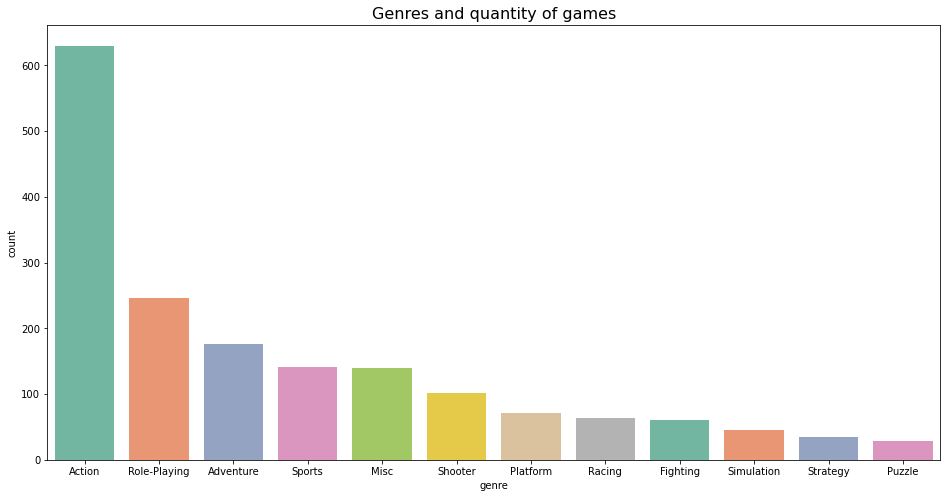

In [49]:
col_order2 = games_and_genres.index

plt.figure(figsize=(16, 8))
sns.countplot(x='genre', data=good_data, order=col_order2, palette='Set2')
plt.title('Genres and quantity of games', fontsize=16)
plt.show()

С началом и концом списка все понятно: action и rpg как раз были в лидерах, а игры для "мозгов" - в аутсайдерах. Но почему так мало шутеров, ведь они на втором месте по продажам? У меня есть версия, что их просто не нужно много - самые известные за все время это Counter Strike, Call of Duty (он у нас, кстати, вообще оказался самой прибыльной игрой в нашем датасете) - это франшизные истории, в которые люди играют годами. Кто-то может еще и Quake вспомнит (аж слеза навернулась). Это культовые игры, вокруг которых собираются огромные сообщества и проводятся международные соревнования. Они явно берут качеством, а не количеством. Издатели прикладывают максимум усилий для обновления существующей популярной стрелялки, вместо создания новой.

<a name="x3.5"></a> 
### Выводы раздела

**Итак, наш исследовательский анализ показал, что:**


1. Игровая индустрия (судя по предоставленному набору данных) начала свое развитие в 80-х годах XX века. Однако бурный рост начался с середины 90-х. Вероятно, этому способствовало развитие вычислительной техники, распространение персональных компьютеров и интернета среди обычных пользователей (и их детей).
2. Количество выпускаемых игр достигло своего пика в 2008-2009 годах, после чего пошло на спад. Вероятно, разработчики стали делать упор на качество, а не на количество. Игры стали сложнее и проработаннее, срок их создания увеличился.
3. В среднем игровые платформы живут 7-12 лет. Причем, наибольшего успеха за всю историю наблюдений достигли различные поколения PlayStation и XBox. Как наиболее перспективные на следующий год нами как раз и были отмечены PS4 и XOne.
4. Медианный доход от большинства игр сравнительно небольшой по сравнению с прибылью от хитов (это выбросы на наших boxplot). Игры-хиты приносят платформам миллионы долларов, составляя значительный процент от итоговой "кассы", тогда как остальные довольствуются малым. Но ведь заранее не знаешь, хит у тебя будет или "середнячок".
5. В том, что касается прибыли, самой успешной за все время наблюдений оказалась PS2 - ее суммарные продажи достигли 1255.77$ млн!
6. Корреляция между оценками пользователей и продажами существует, но она очень незначительная. Оценки пользователей менее интересны, чем оценки критиков, т.к последние имеют бОльшую корреляцию с продажами. Лучше всего продаются игры с оценками в районе 80 баллов от критиков (или в районе 7-8 баллов от пользователей). В целом несмотря на сравнительно невысокую корреляцию, мы все же наблюдаем некую связь между продажами и оценками для всех рассмотренных платформ.
7. Самыми популярными жанрами оказались: Action, Shooter, Role-playing, Sports, Platform. Самыми непопулярными: Strategy, Puzzle, Adventure. Это суммарным продажам. А по средним топ-5 выглядит так: Shooter, Platform, Racing, Sports, Simulation.
8. В том, что касается количества выпускаемых игр отличились:
    - Shooter - жанр очень популярен, но игр выпускается сравнительно немного (пришли к выводу, что тут правят баллом игры-хиты, в которые играют долго и массово);
    - Adventure - жанр третий с конца по популярности, зато по количеству выпускаемых игр он тоже 3-й, но уже с начала списка.


<a name="x4"></a> 
## Портреты пользователей
Определим для каждого из регионов самые популярные платформы, жанры и посмотрим, влияет ли рейтинг ESRB на продажи. Для данного анализа возьмем данные с 2010 по 2016 годы. Тут 2016 год можно не отбрасывать.

<a name="x4.1"></a> 
### Самые популярные платформы в каждом регионе

In [50]:
# напишем функцию для нахождения топ-5 платформ в каждом регионе и вывода доли продаж в регионе от общих продаж

def region_top5_and_sales(region_sales, data):
    region_data = data.pivot_table(index='platform',values=[region_sales,'total_sales'],aggfunc=(
        'sum')).sort_values(by=region_sales, ascending=False).head()
    
    region_data['ratio'] = region_data[region_sales]/region_data['total_sales']
    return region_data

In [51]:
# получим нужный срез данных
fresh_data = df.query('year_of_release >= 2010')
region_sales_list = ['na_sales', 'eu_sales', 'jp_sales']

# выведем рузультат с помощью цикла
for region in region_sales_list:
    string = region[:2].upper() + ' top-5 platfroms and sales ratio:'
    print('{: ^41}'.format(string))
    print()
    print(region_top5_and_sales(region, fresh_data))
    print('-----------------------------------------')
    print()

   NA top-5 platfroms and sales ratio:   

          na_sales  total_sales     ratio
platform                                 
X360        334.18       550.41  0.607147
PS3         229.25       587.74  0.390053
Wii         121.20       222.97  0.543571
PS4         108.74       314.14  0.346151
XOne         93.12       159.32  0.584484
-----------------------------------------

   EU top-5 platfroms and sales ratio:   

          eu_sales  total_sales     ratio
platform                                 
PS3         213.60       587.74  0.363426
X360        163.41       550.41  0.296888
PS4         141.09       314.14  0.449131
PC           68.82       121.96  0.564283
Wii          65.91       222.97  0.295600
-----------------------------------------

   JP top-5 platfroms and sales ratio:   

          jp_sales  total_sales     ratio
platform                                 
3DS         100.62       257.81  0.390287
PS3          59.26       587.74  0.100827
PSP          42.20        64.

В Северной Америке в лидерах несколько поколений XBox, несколько поколений PS и Wii. Причем X360 и его "потомок" XOne зарабатывают дома (т.к платформы американская) по 60% от общей выручки по всему миру. Почти то же самое можно сказать и про японский Wii (наследник Nintendo) - 58% всех продаж приходятся на Северную Америку. PS3 и PS4 в Америке получают 40% и 34% соотв. от своих мировых продаж. В общем, как ни крути, а в богатых странах развитого капитализма все продается очень даже хорошо.  

Европа не отличается оригинальностью: те же лидеры, и в целом все довольно похоже на Северную Америку, разве что чуть скромнее  по продажам. Но тут заметно выделяется PC - 54% и "свежий" PS4 - 45%. Получается, одна половина европейцев консервативна и предпочитает играть через персональный комьютер, зато другая рвется в будущее и вовсю разбирает новинки. 

Японцы же всегда были на своей волне: тут очень популярна портативная PSP - 65% ее продаж приходится именно на Японию. При этом другие популярные платформы это 3DS (40%), PS3 (10%), DS (22%) и PSV (40%). Получается, что за исключением PS3 (которая лидирует в Америке), перечисленные платформы в других регионах в топ-5 не попадают.

В итоге, игры для X360, XOne и Wii лучше продавать в Северной Америке, в Европе стоит сделать упор на PC и PS4, а в Японии - на PSP и 3DS и PSV =)

<a name="x4.2"></a>
### Самые популярные жанры в каждом регионе

In [52]:
# напишем функцию для вывода порулярных жанров

def region_top5_genres_and_sales(region_sales, data):
    region_data = data.groupby(['genre']).agg({region_sales:'sum'}).sort_values(by = region_sales, ascending = False)
    return region_data[region_sales].head()

NA top-5 genres (by sales)
genre
Action          290.64
Shooter         237.47
Sports          156.81
Misc            123.80
Role-Playing    112.05


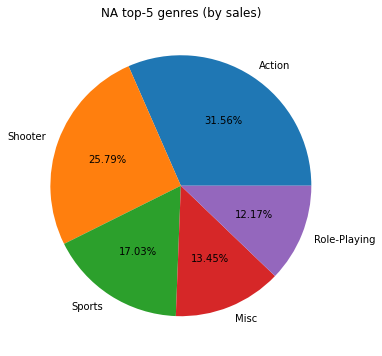

--------------------------------------------------
--------------------------------------------------

EU top-5 genres (by sales)
genre
Action          233.63
Shooter         171.45
Sports          116.84
Role-Playing     75.48
Misc             66.09


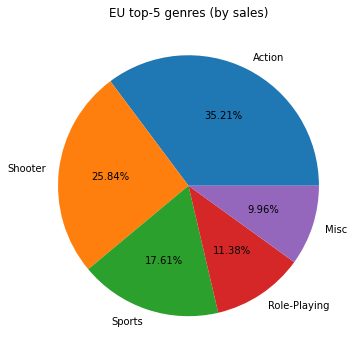

--------------------------------------------------
--------------------------------------------------

JP top-5 genres (by sales)
genre
Role-Playing    103.54
Action           72.20
Misc             24.29
Platform         15.81
Adventure        15.67


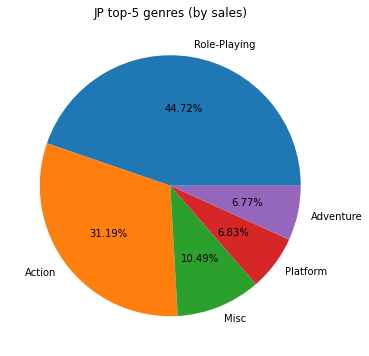

--------------------------------------------------
--------------------------------------------------



In [53]:
# слегка модифицируем наш старый цикл
# в функцию его оформлять не стал, мне кажется, что это не имеет смысла т.к сейчас нужно слегка подправить оформление вывода
# а для большей наглядности представим эту информацию еще и в графическом виде
# выше я использовал разные способы отображения, но не все, и кажется, что настал час круговых диаграмм!

for region in region_sales_list:
    title = region[:2].upper() + ' top-5 genres (by sales)'
    data = region_top5_genres_and_sales(region, fresh_data)
    print(title)
    print(data.to_string())
    data.plot(kind='pie', title=title, figsize=(6,6), autopct='%.2f%%')
    plt.axis('off')
    plt.show()
    print('--------------------------------------------------')
    print('--------------------------------------------------')
    print()

В Америке и Европе популярны одни и те же жанры: Action, Shooter и Sports занимают первые три места, а Role-playing и Misc ("разное"?) замыкают пятерку. В Японии же картинка несколько иная: в лидерах Role-playing, Action и Misc, зато 4-е и 5-е места достались Platform и Adventure. 

<a name="x4.3"></a>
### Проверим, влияет ли рейтинг ESRB на продажи? 

In [54]:
# посмотрим на цифры
# группируем данные нужным образом и выводим результат

rating_data = good_data.pivot_table(index='rating',values=['na_sales','eu_sales', 'jp_sales'],aggfunc=('sum'))
rating_data

,eu_sales,jp_sales,na_sales
rating,,,
E,75.10,29.76,80.72
E10+,31.08,8.32,43.71
M,86.93,9.28,95.15
T,31.26,16.57,38.97
unknown,68.04,87.96,77.48


A теперь посмотрим на графики (мужчины любят глазами).

Используем список rating_order для вывода категории в строгом правильном порядке - от самой детской - Е, до взрослой - M. 
Категория unknown идет в самом конце - мы не знаем, что там, лучше поберечь детей, поэтому сочтем ее взрослой.

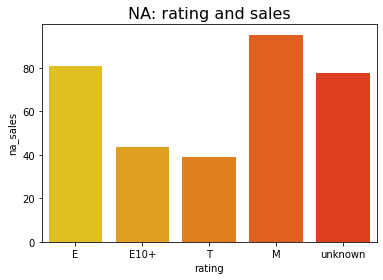

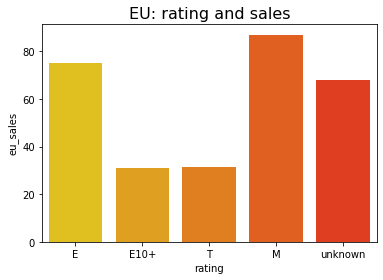

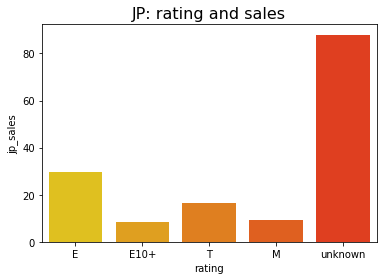

In [55]:
rating_order = ['E', 'E10+', 'T', 'M', 'unknown']


# цикл для вывода графиков

for region in region_sales_list:
    sns.barplot(y=region, x='rating', ci=None,  data=good_data, estimator=sum, order=rating_order, palette="autumn_r")
    title = region[:2].upper() + ': rating and sales'
    plt.title(title, fontsize=16)
    plt.show()

Северная Америка и Европа практически близнецы, а Япония снова на своей волне. Подробные выводы см. ниже.

<a name="x4.4"></a>
### Выводы раздела

**Составляя портреты пользователей по регионам мы обнаружили, что:**


1. Европа и Северная Америк имеют не так уж и много различий. Геймеры из этих регионов в целом предпочитают одни и те же платформы и игровые жанры. Тут популярны различные поколения PS и XBox, на которых рубятся в экшены, стрелялки, спортивные и ролевые игры.
2. Япония это немного другой мир и другие люди. Даже в том, что касается игр. Они всегда предпочитали свою технику, автомобили, и, как выяснилось, игровые платформы. Японцы отдают предпочтение 3DS, PS3 и портативной PSP. Шутеры тут не в моде, зато помимо популярных в других регионах Action и Role-playing, в топ-5 тут попали Adventure и Platform (не знаю, что это такое, если честно).
3. Анализ связи продаж с рейтингом возрастных ограничений ESRB показывает, что в Европе и Америке продается больше всего игр категории М - mature - т.е. для взрослой аудитории, а вторая по популярности группа это E - everyone - т.е игры, для аудитории от 6 лет и старше, на третьем же месте у нас категория unknown - игры, у которых отстутствует информация о рейтинге ESRB. С Японией же все опять иначе: на первом месте unknown, а среди остальных вперед выходит Е - игры для всех. И тут все объясняется довольно просто: ESRB это американско-канадская организация, а в Японии куда более распространены оценки своего собственного агенства - CERO (Computer Entertainment Rating Organization). Тайна раскрыта, идем дальше.

<a name="x5"></a>
## Исследование статистических показателей

Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитаем среднее количество, дисперсию и стандартное отклонение. 


<a name="x5.1"></a>
### Расчет статистических показателей

In [56]:
# напишем функцию для получения нужных метрик

def scores_and_genres(data, col):
    df = data.groupby(['genre']).agg(
    SALES=('total_sales', 'sum'),
    MEAN=(col, 'mean'),
    STD=(col, 'std'),
    VAR=(col, 'var'),
     ).sort_values(by = 'SALES', ascending = False)
    print(df.to_string())
    print('------------------------------------------------------')
    print()

In [57]:
# получим результат для пользовательского рейтинга

print()
print('User scores and genres'.upper())
scores_and_genres(good_data, 'user_score')

# повторим процесс для оценок критиков

print('Critic scores and genres'.upper())
scores_and_genres(good_data, 'critic_score')


USER SCORES AND GENRES
               SALES      MEAN       STD       VAR
genre                                             
Action        227.74  6.847525  1.312391  1.722370
Shooter       160.07  6.674390  1.368590  1.873040
Role-Playing  139.07  7.644792  0.878500  0.771762
Sports         95.87  5.762245  1.632815  2.666086
Platform       65.24  6.956140  1.499169  2.247506
Racing         47.27  6.579545  1.533590  2.351897
Misc           43.50  6.957692  1.113614  1.240136
Fighting       30.55  7.072222  1.381844  1.909492
Simulation     29.65  6.813333  1.560159  2.434095
Adventure      17.95  7.436170  1.331790  1.773663
Puzzle          7.09  7.153846  1.209418  1.462692
Strategy        4.72  6.276923  2.411139  5.813590
------------------------------------------------------

CRITIC SCORES AND GENRES
               SALES       MEAN        STD         VAR
genre                                                 
Action        227.74  69.140221  12.612849  159.083969
Shooter       16

<a name="x5.2"></a>
### Выводим диаграммы рассеяния

Построим диаграммы рассеяния для оценок и продаж для нескольких интересных нам жанров, данные возьмем за все время наблюдений.

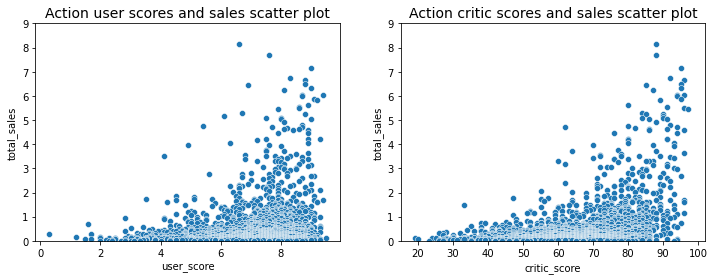

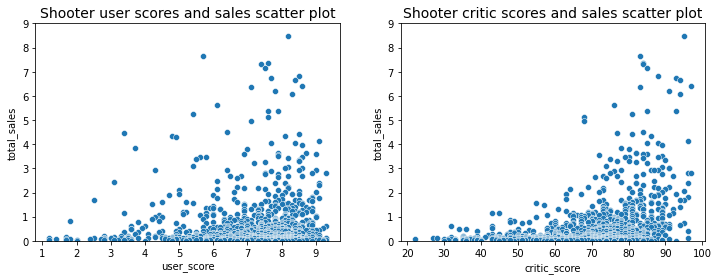

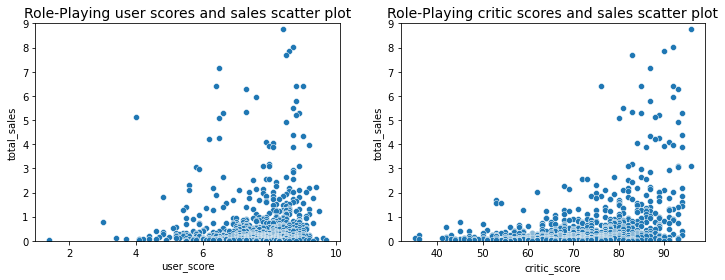

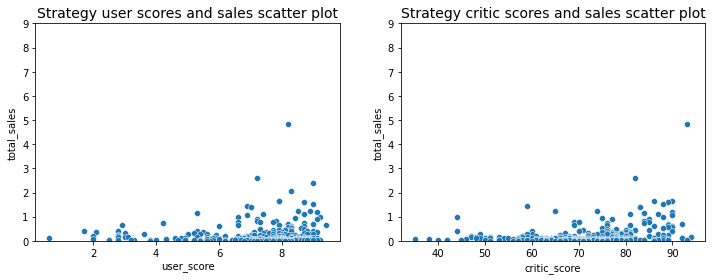

In [58]:
# у нас оказывается и функция подходящая уже имеется =)

# список популярных жанров
interesting_genres = ['Action', 'Shooter', 'Role-Playing', 'Strategy']

# выведем графики через цикл
for g in interesting_genres:
    genre_sales = df[df['genre'] == g]
    scatterplot_from_data('user_score', 'critic_score', 'total_sales', genre_sales, g)

<a name="x5.3"></a>
### Выводы раздела

**Исследование статистических показателей рейтинга игр различных жанров дало следующие результаты:**

1. Самым популярным жанром является Action (это мы знали и раньше), но что интересно, средние оценки в этом жанре отнюдь не самые высокие: 6,85 у пользователей и 69,1 и у критиков. 
2. Самые высокие оценки пользователей мы наблюдаем в жанре Role-Playing - 7.64, а вот критики благоволят жанру Shooter - средний балл там 75.5.
3. Что касается стандартного отклонения, интересные результаты показал не самый прибыльный жанр Strategy. Среди пользователей std = 2,4 и среди критиков std = 16,9. Это довольно много по сравнению с другими жанрами. Можно предположить, что в этом жанре диапазон оценок шире, этот показатель более изменчив, чем в других жанрах - видимо, мнения о качестве игры тут сходятся реже :)

<a name="x6"></a>
## Проверка гипотез

1. Проверим гипотезу, что средние пользовательские рейтинги платформ XboxOne и PC одинаковые.
Для этого сформулируем нулевую гипотезу: рейтинги одинаковые и альтернативную - средние рейтинги отличаются.
2. Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. Нулевая гипотеза: рейтинги одинаковые, альтернативная: рейтинги разные.

Нулевую гипотезу всегда формулируем так, чтобы она была утвердительной - т.е. присутствовали слова "равны", "одинаковы" и т.п.

<a name="x6.1"></a>
### Проверка первой гипотезы

In [59]:
# получаем нужные массивы данных, удаляем пропуски, сбрасываем индекс

array1 = df.query("platform == 'XOne'")['user_score'].dropna().reset_index(drop=True)
array2 = df.query("platform == 'PC'")['user_score'].dropna().reset_index(drop=True) 

# проверяем равенство дисперсий, чтобы правильно задать equal_var на след. шаге

print(array1.var(ddof=1))
print(array2.var(ddof=1))

1.9069968429360702
2.3407871413372


Дисперсии не равны. поэтому проверку гипотезы осуществляем так:

In [60]:
# критический уровень статистической значимости
alpha = 0.05  

# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(array1, array2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    


p-значение: 4.935072360183565e-06
Отвергаем нулевую гипотезу


<a name="x6.2"></a>

### Проверка второй гипотезы

Повторяем процесс для второй гипотезы:
В качестно нулевой гипотезы примем следующую: средние польз. рейтинги жанров Action и Sports равны.

In [61]:
array3 = df.query("genre == 'Action'")['user_score'].dropna().reset_index(drop=True)
array4 = df.query("genre == 'Sports'")['user_score'].dropna().reset_index(drop=True) 

# проверяем равенство дисперсий, чтобы правильно задать equal_var на след. шаге

print(array3.var(ddof=1))
print(array4.var(ddof=1))


results = st.ttest_ind(array3, array4, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    


2.031746898033191
2.5965147189730073
p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


<a name="x6.3"></a>
### Выводы раздела

   
1. В первом случае наша гипотеза заключалась в равенстве средих рейтингов для платформ Xone и PC. Мы получили p.value = 4.93e-06 и отвергли нулевую гипотезу о равенстве средних. Следовательно средние рейтинги платформ отличаются.
2. А потом мы проверяли гипотезу о различии средних рейтингов жанров Action и Sports. Мы получили p.value = 0.11 и не смогли отвергунть нулевую гипотезу о равенстве стредних. Следовательно первоначальная гипотеза о неравенстве средних рейтингов ошибочна.

<a name="x7"></a>

## Общие выводы

Мы провели большую работу с данными в попытке выявить закономерности успешности тех или иных игр. Краткие выводы представлены ниже, а более подробный анализ был дан выше, в конце каждого из разделов.
_______
Выводы:

1. Для начала познакомились с данными и провели их первичную обработку.
2. Максимальное количество выпускаемых игр пришлось на период с 2008 по 2010 год.
3. Наиболее прибыльными за все время оказались игровые плафтормы нескольких поколений PlayStitaion и XBox, а также Wii. 
4. В целом же срок жизни платформы составляет 7-12 лет. 
5. На 2017 год наиболее перспективными кажутся PS4 и XOne. Я бы делал ставку на них. 
6. Если мы говорим про Японию, то несколько лет назад у них заметно выделялись 3DS (Nintendo) и PSP, которые на других рынках уже не так популярны, да и в целом продажи на них пошли на спад.
7. Доход от игр вещь интересная: медианные значения у большинства игр относительно невысокие, зато "выбросы" за счет игр-хитов приносят компаниям серьезные деньги - 8-15 млн $.
8. Корреляция между оценками пользователей / критиков и продажами существует, но она относительно невысокая. Правда, оценки критиков коррелируют с продажами сильнее. Но сложно сказать, являются ли высокие продажи следствием высоких оценок. Вполне может быть и наоборот: популярные игры, которые хорошо продаются, критики и пользователи оценивают выше (было бы глупо спорить с продажами). Корреляция может показать лишь наличие и отсутсвие связи, но она ничего не говорит нам о причинно-следственном аспекте ("каузальности"). Интересно, что наибольшая вариативность в оценках является отличительной чертой жанар Strategy. Также стоит отметить, что наибольшие оценки отнюдь не всегда являются признаком наибольшей прибыли. Ориентироваться только на них точно не стоит.
9. Если говорить о прибыльности жанров, то нам точно стоит делать ставку на Action, Shooter, Role-playing и Sports игры. Конечно, для расширения ассортимента можно добавить Adventure, Puzzle и Strategy, но надо иметь в виду, что продаются они хуже всего.
10. Игр жанра Action выпускается больше всего. Игр жанра Puzzle - меньше всего. Интересно, что Shooter-ов при том, что они на втором месте по продажам выпускается сравнительно немного, куда меньше, чем слабых по продажам Adventure (они на 3-ем месте по количеству игр и на 3-ем с конца месте по продажам). 
11. Портреты геймеров из Северной Америки и Европы отличаются слабо: предпочитают одни и те же платформы (и одни и те же жанры игр, а вот японцы себе на уме. 
12. Анализ возрастных ограничений показал нам, что лучше всего продаются игры M (для взрослой аудитории) и категорий E (для самых маленьких). Игры T (для тинейджеров) почему-то продаются хуже всего. Данные по Японии в данной части анализа имеют низкую степень релевантности, т.к у большинства игр рейтинг ESRB отстуствует (мы уже разобрались, что там предпочитают свой рейтинг CERO). 
13. Средние пользовательские оценки платформ XOne и PC отличаются. Наша первоначальная гипотеза об их равенстве оказалась ошибочной. И вторая гипотеза о различии средних пользовательских оценок жанров Action и Sports тоже не подтвердилась.
____
---THE END---